# Creating and Backtesting SMA Strategies

## Getting the Data

In [459]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use("seaborn")

In [460]:
data = pd.read_csv("eurusd.csv", parse_dates=["Date"], index_col=["Date"])

In [461]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [462]:
data["returns"] = np.log(data.price / (data.price.shift(1)))

In [463]:
data.dropna(inplace=True)

In [464]:
data

,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


In [465]:
data["creturns"] = data.returns.cumsum().apply(np.exp)

In [466]:
data

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


## A simple Buy and Hold "Strategy"

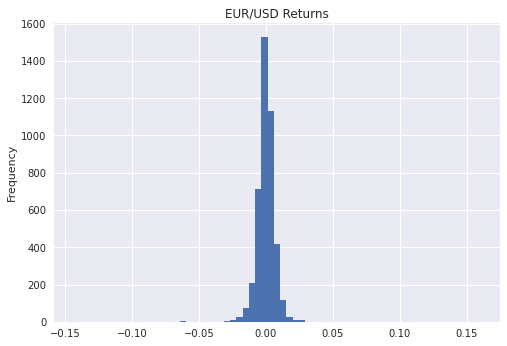

In [467]:
data.returns.plot(kind="hist", bins = int(np.sqrt(len(data))))
plt.title("EUR/USD Returns")
plt.show()

In [468]:
data.returns.sum()

-0.11214302770699758

In [469]:
np.exp(data.returns.sum())

0.8939163935445148

In [470]:
data.price.iloc[-1]/data.price.iloc[0]

0.8939163935445141

In [471]:
data.returns.mean() * 252

-0.0066120830561917105

In [472]:
data.returns.std() * np.sqrt(252)

0.12054120479431393

In [473]:
data

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


## More Performance Metrics

__annualized mean return and risk__

In [474]:
data.returns.mean() * 252

-0.0066120830561917105

In [475]:
data.returns.std() * np.sqrt(252)

0.12054120479431393

__maximum drawdown__

In [476]:
data["cummax"] = data.creturns.cummax()

In [477]:
data

,price,returns,creturns,cummax
Date,,,,
2004-01-02,1.258194,0.000000,1.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,1.011055,1.011055
2004-01-07,1.264095,-0.006315,1.004690,1.011055
2004-01-08,1.277498,0.010547,1.015343,1.015343
...,...,...,...,...
2020-06-24,1.131235,0.002892,0.899094,1.270709
2020-06-25,1.125087,-0.005449,0.894208,1.270709
2020-06-26,1.122208,-0.002562,0.891920,1.270709


<AxesSubplot:xlabel='Date'>

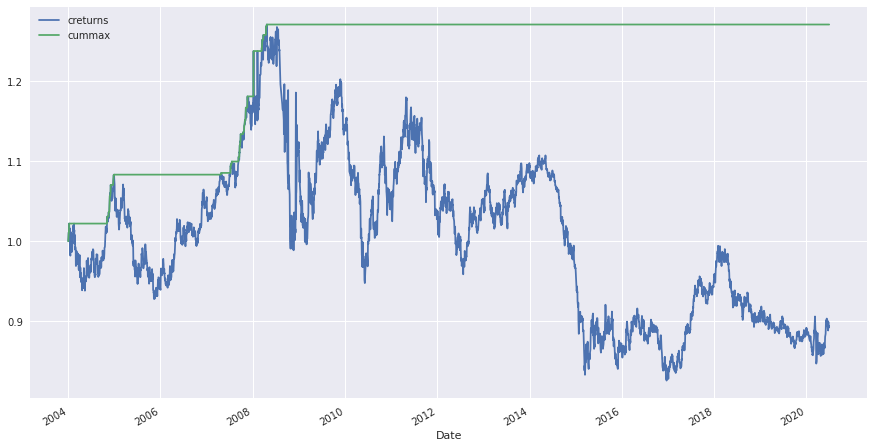

In [478]:
data[["creturns", "cummax"]].dropna().plot(figsize=(15,8))

In [479]:
drawdown = data['cummax'] - data['creturns']
drawdown

Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
                ...   
2020-06-24    0.371615
2020-06-25    0.376500
2020-06-26    0.378788
2020-06-29    0.378488
2020-06-30    0.376792
Length: 4274, dtype: float64

In [480]:
drawdown.max()

0.4448840569933439

In [481]:
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')

## Defining an SMA Crossover Strategy

In [482]:
#import packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn") 

In [483]:
data = pd.read_csv("eurusd.csv", parse_dates=['Date'], index_col=['Date']) #read file, parse dates, set dates to index

In [484]:
data #print the pandas dataframe

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [485]:
sma_s = 46
sma_l = 137


In [486]:
data.price.rolling(50)

Rolling [window=50,center=False,axis=0,method=single]

In [487]:
data['SMA_S'] = data.price.rolling(sma_s).mean()

In [488]:
data['SMA_L'] = data.price.rolling(sma_l).mean()

In [489]:
data.dropna(inplace=True)

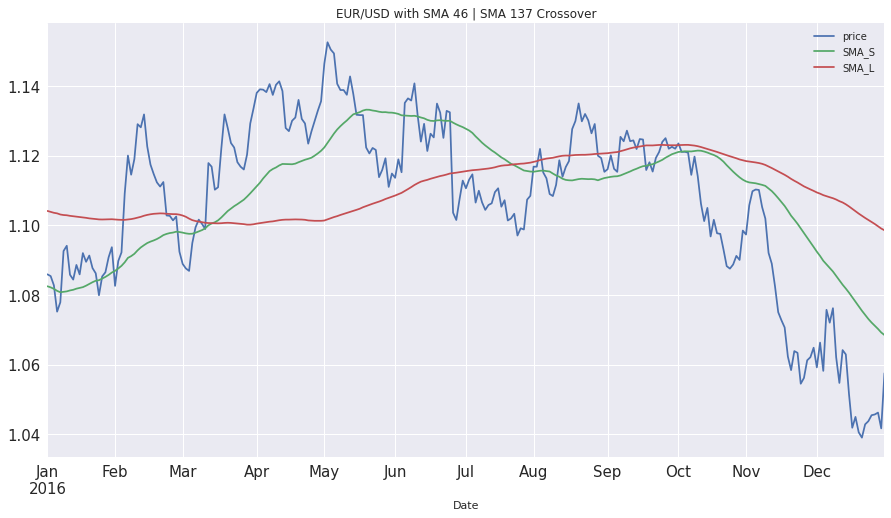

In [490]:
data.loc['2016'].plot(figsize=(15,8), title = "EUR/USD with SMA {} | SMA {} Crossover".format(sma_s, sma_l), fontsize = 15)
plt.show()

In [491]:
data['position'] = np.where(data['SMA_S'] > data['SMA_L'], 1, -1)
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-07-09,1.241897,1.212185,1.227891,-1
2004-07-12,1.240803,1.213333,1.227764,-1
2004-07-13,1.233304,1.214392,1.227583,-1
2004-07-14,1.238497,1.215486,1.227362,-1
2004-07-15,1.235605,1.216466,1.227096,-1
...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1
2020-06-25,1.125087,1.103905,1.102737,1
2020-06-26,1.122208,1.104801,1.102788,1


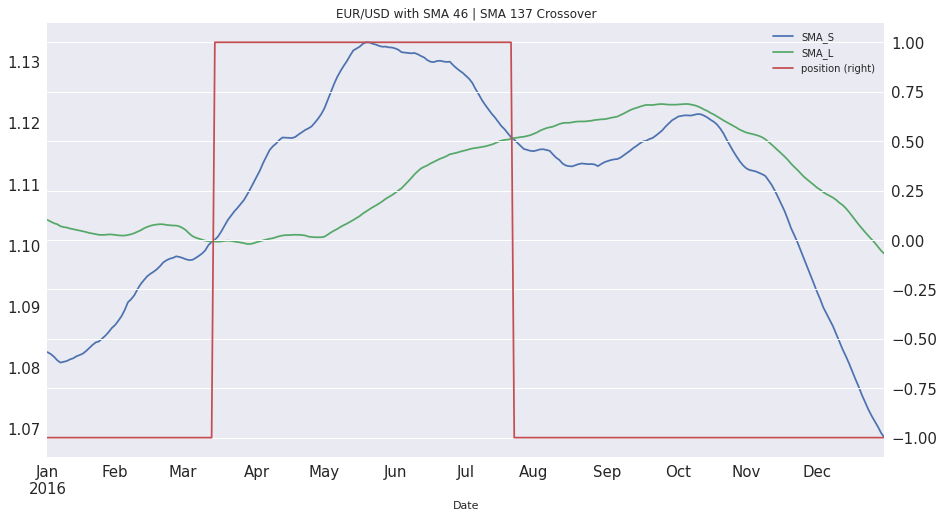

In [492]:
data.loc['2016',['SMA_S', 'SMA_L', 'position']].plot(figsize=(15,8), secondary_y="position", title = "EUR/USD with SMA {} | SMA {} Crossover".format(sma_s, sma_l), fontsize = 15)
plt.show()

## Vectorized Strategy Backtesting

In [493]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-07-09,1.241897,1.212185,1.227891,-1
2004-07-12,1.240803,1.213333,1.227764,-1
2004-07-13,1.233304,1.214392,1.227583,-1
2004-07-14,1.238497,1.215486,1.227362,-1
2004-07-15,1.235605,1.216466,1.227096,-1
...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1
2020-06-25,1.125087,1.103905,1.102737,1
2020-06-26,1.122208,1.104801,1.102788,1


In [494]:
data['returns'] = np.log(data.price / data.price.shift(1))
data['strategy'] = data.position.shift(1) * data['returns']
data['creturns'] = data.returns.cumsum().apply(np.exp)
data['cstrategy'] = data.strategy.cumsum().apply(np.exp)
data.dropna(inplace=True)
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-07-12,1.240803,1.213333,1.227764,-1,-0.000881,0.000881,0.999119,1.000882
2004-07-13,1.233304,1.214392,1.227583,-1,-0.006062,0.006062,0.993081,1.006967
2004-07-14,1.238497,1.215486,1.227362,-1,0.004202,-0.004202,0.997263,1.002745
2004-07-15,1.235605,1.216466,1.227096,-1,-0.002338,0.002338,0.994934,1.005092
2004-07-16,1.245594,1.217883,1.226961,-1,0.008051,-0.008051,1.002977,0.997032
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892,0.910893,2.541328
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449,0.905943,2.527519
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562,0.903625,2.521051


In [495]:
data[['returns', 'strategy']].sum()

returns    -0.099105
strategy    0.926912
dtype: float64

In [496]:
data[['returns', 'strategy']].sum().apply(np.exp)

returns     0.905647
strategy    2.526694
dtype: float64

In [497]:
data[['strategy','returns']].mean()*252

strategy    0.056448
returns    -0.006035
dtype: float64

In [498]:
data[['strategy','returns']].std() * np.sqrt(252)

strategy    0.120366
returns     0.120418
dtype: float64

<AxesSubplot:xlabel='Date'>

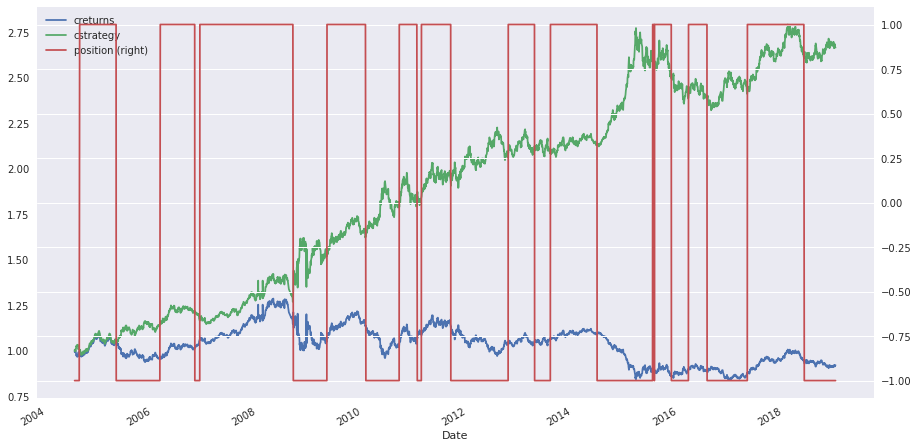

In [518]:
data[['creturns','cstrategy', 'position']].loc['2004':'2018'].plot(figsize=(15,8), secondary_y="position")

## Finding the optimal SMA Strategy

In [521]:
data = pd.read_csv("eurusd.csv", parse_dates=['Date'], index_col=['Date']) #read file, parse dates, set dates to index
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [522]:
def test_strategy(SMA):
    tData = data.copy()
    tData['returns'] = np.log(tData.price / tData.price.shift(1))
    tData['SMA_S'] = tData.price.rolling(SMA[0]).mean()
    tData['SMA_L'] = tData.price.rolling(SMA[1]).mean()
    tData.dropna(inplace = True)
    
    tData['position'] = np.where(tData['SMA_S'] > tData['SMA_L'],1,-1)
    tData['strategy'] = tData.position.shift(1) * tData['returns']
    tData.dropna(inplace=True)
    
    return np.exp(tData['strategy'].sum())

In [523]:
test_strategy([75,150])

1.58974017632631

In [524]:
SMA_S_Range = range(1,50,1)
SMA_L_Range = range(51,252,1)
SMA_S_Range

range(1, 50)

In [525]:
from itertools import product
combis = list(product(SMA_S_Range, SMA_L_Range))

In [526]:
#results = []
#for i in combis:
#    results.append(test_strategy(i))
results

[0.5070851644163048,
 0.4768909813338549,
 0.41696220714176574,
 0.39151191052763396,
 0.379651115879883,
 0.3838603702214021,
 0.35844308165371097,
 0.443759648073886,
 0.4551299703444352,
 0.4606558696724596,
 0.4590358056234842,
 0.4470513527230207,
 0.4624779909040295,
 0.4727378173527508,
 0.4252633176874644,
 0.455467962643334,
 0.41055198939903526,
 0.4338738636143191,
 0.42710868070606683,
 0.4502775762114109,
 0.4521216700338142,
 0.4390014909865086,
 0.4326615433453784,
 0.45425107522452485,
 0.4481020528209714,
 0.45625659726763185,
 0.45904210898104025,
 0.45839120149307183,
 0.4478368792736688,
 0.4370990777610467,
 0.4497452702469739,
 0.44271975552071013,
 0.44295141041469366,
 0.47672922753339225,
 0.4783698145006318,
 0.4764003340993594,
 0.49114842908799267,
 0.47064414253475517,
 0.46411247395896715,
 0.44625960889023564,
 0.45641291695054786,
 0.46160467601652266,
 0.43874297505427745,
 0.44958469879842844,
 0.45283318203970896,
 0.43906269269748116,
 0.447265199690

In [527]:
np.max(results)

2.5266939897810787

In [528]:
np.argmax(results)

9131

In [529]:
combis[np.argmax(results)]

(46, 137)

In [530]:
many_results = pd.DataFrame(data = combis, columns = ["SMA_S", "SMA_L"])
many_results

,SMA_S,SMA_L
0,1,51
1,1,52
2,1,53
3,1,54
4,1,55
...,...,...
9844,49,247
9845,49,248
9846,49,249
9847,49,250


In [531]:
many_results['performance'] = results
many_results

,SMA_S,SMA_L,performance
0,1,51,0.507085
1,1,52,0.476891
2,1,53,0.416962
3,1,54,0.391512
4,1,55,0.379651
...,...,...,...
9844,49,247,1.282403
9845,49,248,1.303129
9846,49,249,1.267525
9847,49,250,1.275176


In [532]:
many_results.nlargest(10,'performance')

,SMA_S,SMA_L,performance
9131,46,137,2.526694
9331,47,136,2.513588
8929,45,136,2.490511
9129,46,135,2.464982
7513,38,127,2.455225
9732,49,135,2.447218
9332,47,137,2.439993
9531,48,135,2.439185
9130,46,136,2.432296
7514,38,128,2.427431


In [533]:
many_results.nsmallest(10,'performance')

,SMA_S,SMA_L,performance
6,1,57,0.358443
4,1,55,0.379651
5,1,56,0.383860
3,1,54,0.391512
16,1,67,0.410552
2,1,53,0.416962
14,1,65,0.425263
18,1,69,0.427109
22,1,73,0.432662
17,1,68,0.433874
